# Project Name: Avacado Project


About Project: Avocado is a fruit consumed by people heavily in the United States. The goal is to predict the average price which is continuous in nature of the different type of avocado.

In [440]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [441]:
#Import Dataset
ds= pd.read_csv('avocado.csv')
ds.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [442]:
df= pd.DataFrame(data=ds)
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [443]:
df= df.drop(df.columns[0], axis=1)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [444]:
#Making New Month column from given Date column
df['month'] = pd.DatetimeIndex(df['Date']).month
df['month']

0        12.0
1        12.0
2        12.0
3         6.0
4        11.0
         ... 
16463     NaN
16464     NaN
16465     NaN
16466     NaN
16467     NaN
Name: month, Length: 16468, dtype: float64

In [445]:
#Making Date column from given Date with day
df['Date'] = pd.DatetimeIndex(df['Date']).day
df['Date']

0        27.0
1        20.0
2        13.0
3        12.0
4        29.0
         ... 
16463     NaN
16464     NaN
16465     NaN
16466     NaN
16467     NaN
Name: Date, Length: 16468, dtype: float64

In [446]:
df.shape

(16468, 14)

In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   float64
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
 13  month         1517 non-null   float64
dtypes: float64(12), object(2)
memory usage: 1.8+ MB


In [448]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'month'],
      dtype='object')

In [449]:
df.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000
mean,15.253790,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.362558
std,8.965902,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.472146
min,1.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000
25%,7.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000
50%,15.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000
75%,22.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000
max,31.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000


Observations: Count for all columns is same so no null values present. For XLarge Bags column many outliers are present as there is maximum difference in 75% and max value, along with hat some more columns too. Also, the mean and 50%value of most of the column are same. Also for some columns STD and mean are very close to each other.

In [450]:
df.dtypes

Date            float64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
month           float64
dtype: object

In [451]:
#Checking for Null values
df.isnull().sum()

Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
month           14951
dtype: int64

Observations:Null values present in dataset.

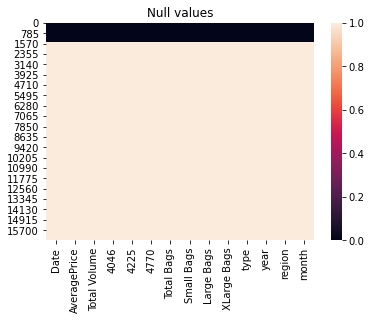

In [452]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

Observations:Null values present in dataset after row no. 1570.

In [453]:
#Removing Null values
df= df.dropna()
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
month           0
dtype: int64

# EDA

Date                AxesSubplot(0.125,0.71587;0.168478x0.16413)
AveragePrice     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Total Volume     AxesSubplot(0.529348,0.71587;0.168478x0.16413)
4046             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
4225               AxesSubplot(0.125,0.518913;0.168478x0.16413)
4770            AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Total Bags      AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Small Bags      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Large Bags         AxesSubplot(0.125,0.321957;0.168478x0.16413)
XLarge Bags     AxesSubplot(0.327174,0.321957;0.168478x0.16413)
year            AxesSubplot(0.529348,0.321957;0.168478x0.16413)
month           AxesSubplot(0.731522,0.321957;0.168478x0.16413)
dtype: object

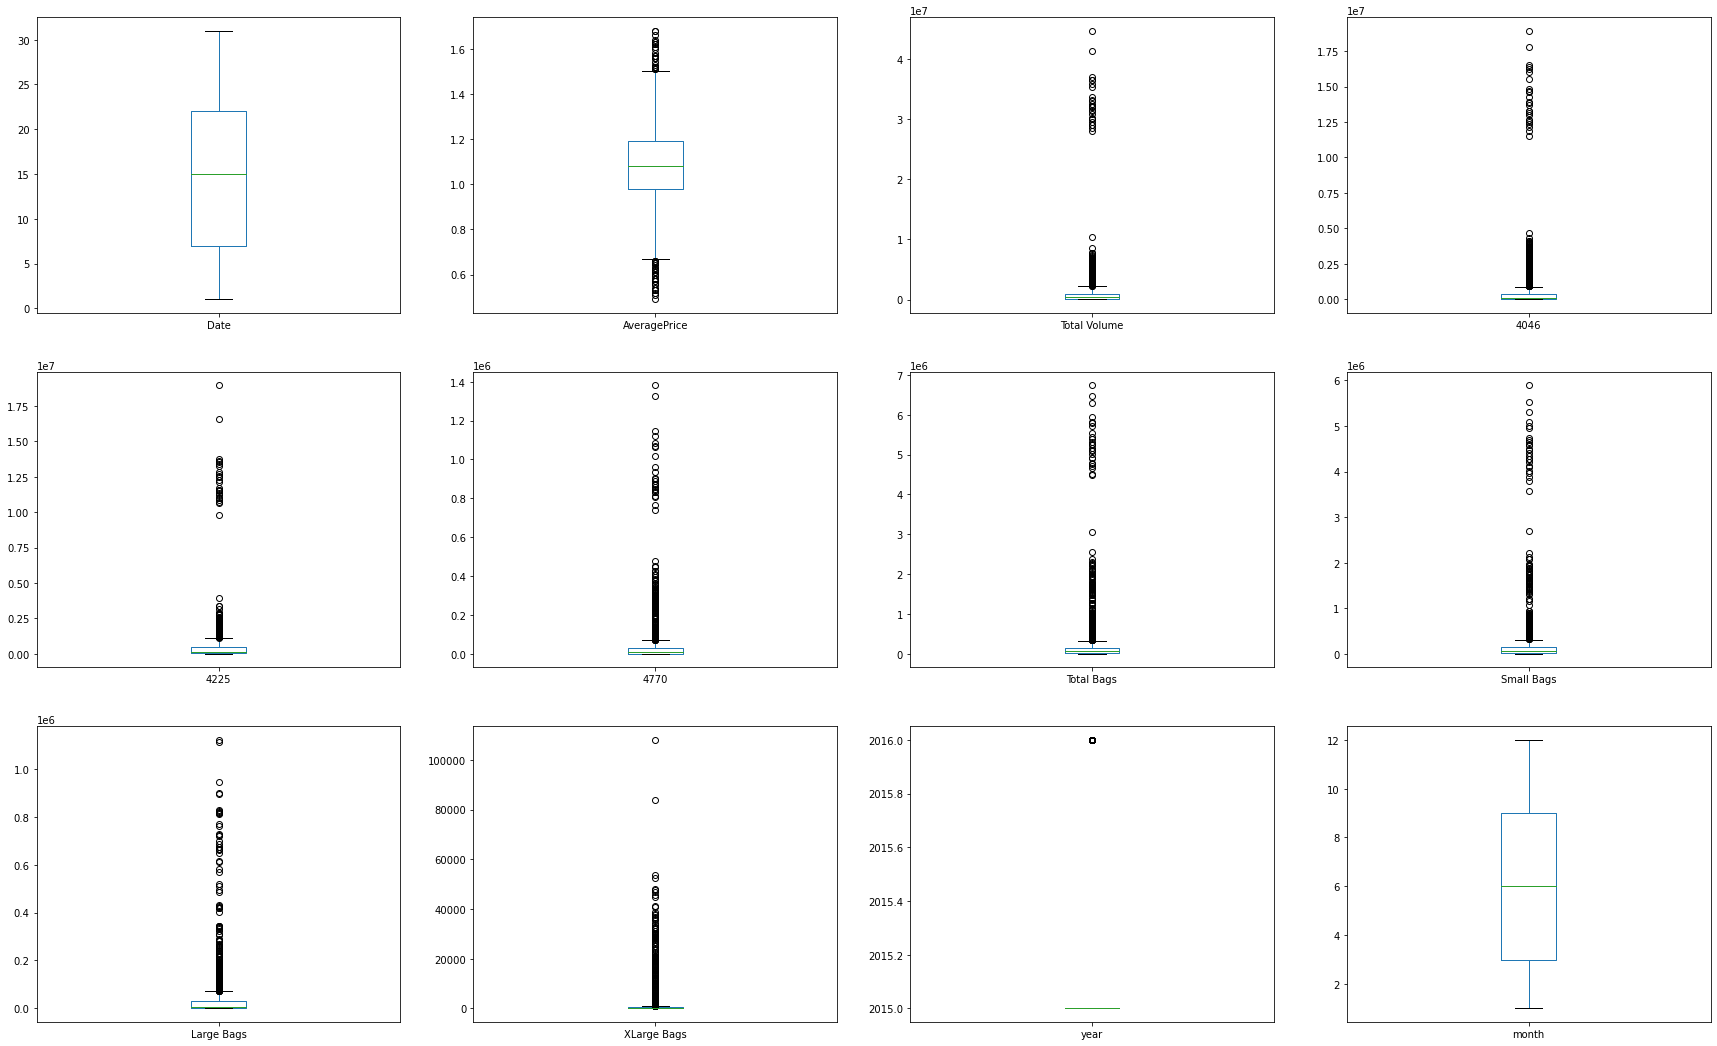

In [454]:
#Univariate Analysis

df.plot(kind= 'box', subplots=True, layout=(4,4), figsize= (30,25))

Observations: We can see that for almost all columns data has outliers present.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013CB8FA1DF0>,
      dtype=object)

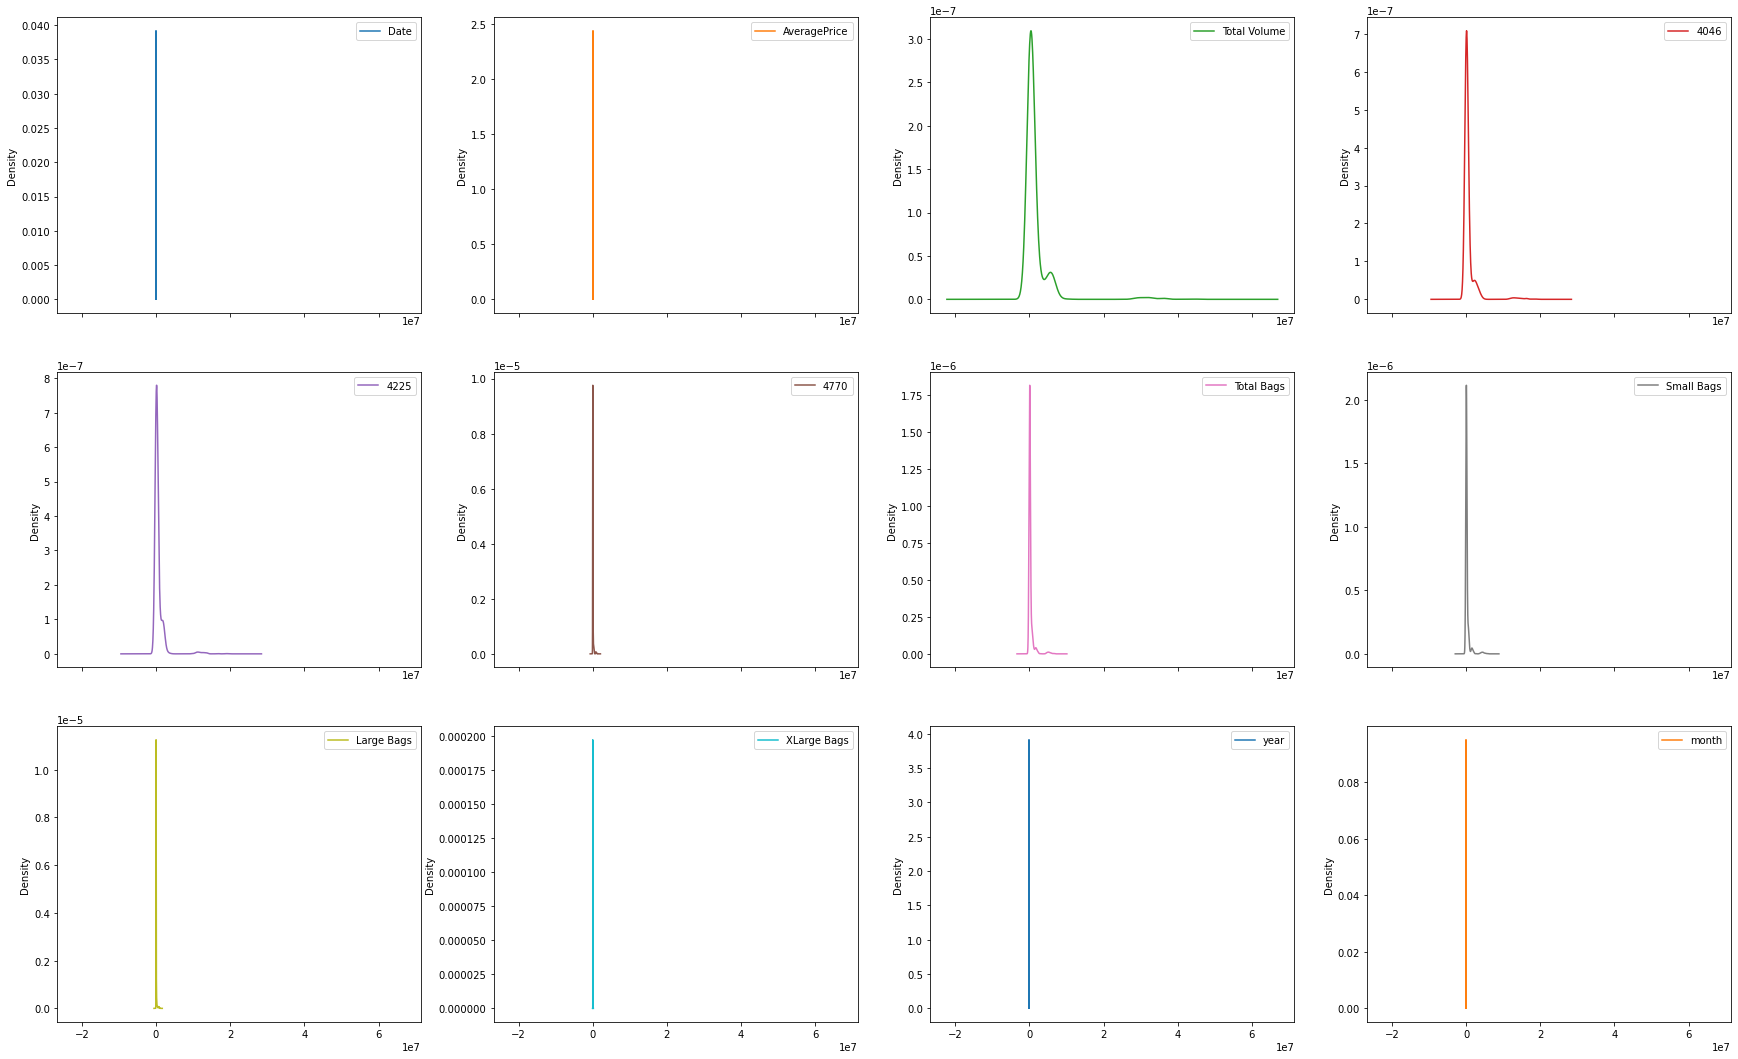

In [455]:
df.plot(kind= 'density', subplots=True, layout=(4,4), figsize= (30,25))

Observations: Average price column data is normally distributed and rest all columns are some what left skewed as data values are not varies in terms of numbers.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013CBB6DC910>,
      dtype=object)

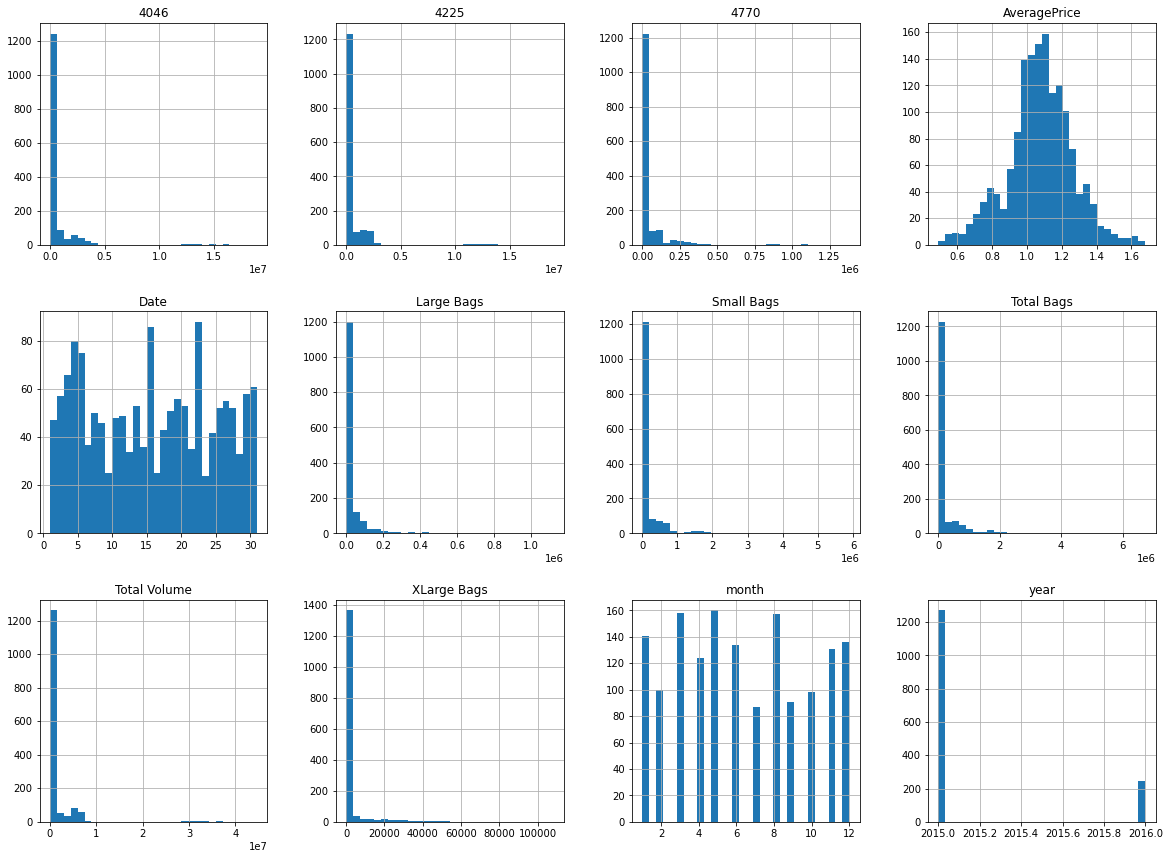

In [456]:
#plotting histogram for univariate analysis and checking the Normal Distribution
df.hist(figsize=(20,20), grid = True, layout = (4,4), bins = 30)

Observations: Average price column data is normally distributed and rest all columns are some what left skewed as data values are not varies in terms of numbers.

In [457]:
#Checking uniqe values for object dtype columns

df['type'].value_counts()

conventional    1517
Name: type, dtype: int64

In [458]:
df['region'].value_counts()

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
TotalUS                25
Nashville              25
Denver                 24
SouthCarolina          24
GrandRapids            23
Chicago                23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
GreatLakes             18
Midsouth               18
Roanoke                17
DallasFtWorth          17
MiamiFtLaude

In [459]:
#Grouping data
df.groupby('year')['type'].value_counts()

year    type        
2015.0  conventional    1270
2016.0  conventional     247
Name: type, dtype: int64

Observations: For the year 2015, conventinal Avacado count was high.

In [460]:
df.groupby('region')['type'].value_counts()

region               type        
Albany               conventional    67
Atlanta              conventional    54
BaltimoreWashington  conventional    65
Boise                conventional    65
Boston               conventional    62
BuffaloRochester     conventional    51
California           conventional    76
Charlotte            conventional    31
Chicago              conventional    23
Columbus             conventional    47
DallasFtWorth        conventional    17
Denver               conventional    24
Detroit              conventional    40
GrandRapids          conventional    23
GreatLakes           conventional    18
HarrisburgScranton   conventional    19
HartfordSpringfield  conventional    13
Houston              conventional    29
Indianapolis         conventional    16
Jacksonville         conventional    41
LasVegas             conventional    10
LosAngeles           conventional     3
Louisville           conventional    34
MiamiFtLauderdale    conventional    17
Midsou

Observations: Highest value count for conventional Avacado was in Albany region. And Low in WestTexNewMexico region.

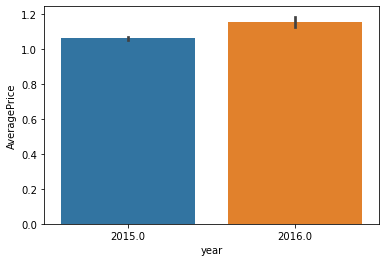

In [461]:
sns.barplot(x= 'year', y= 'AveragePrice', data= df)

Observations: For  year 2016 has more Avacado average Price than year 2015. 

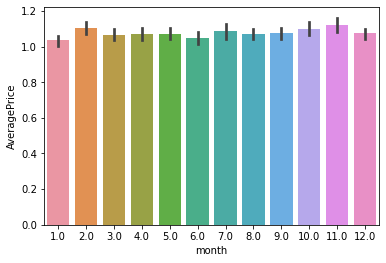

In [462]:
sns.barplot(x= 'month', y= 'AveragePrice', data= df)

Observations: Maximum AveragePrice is in month of October and November.

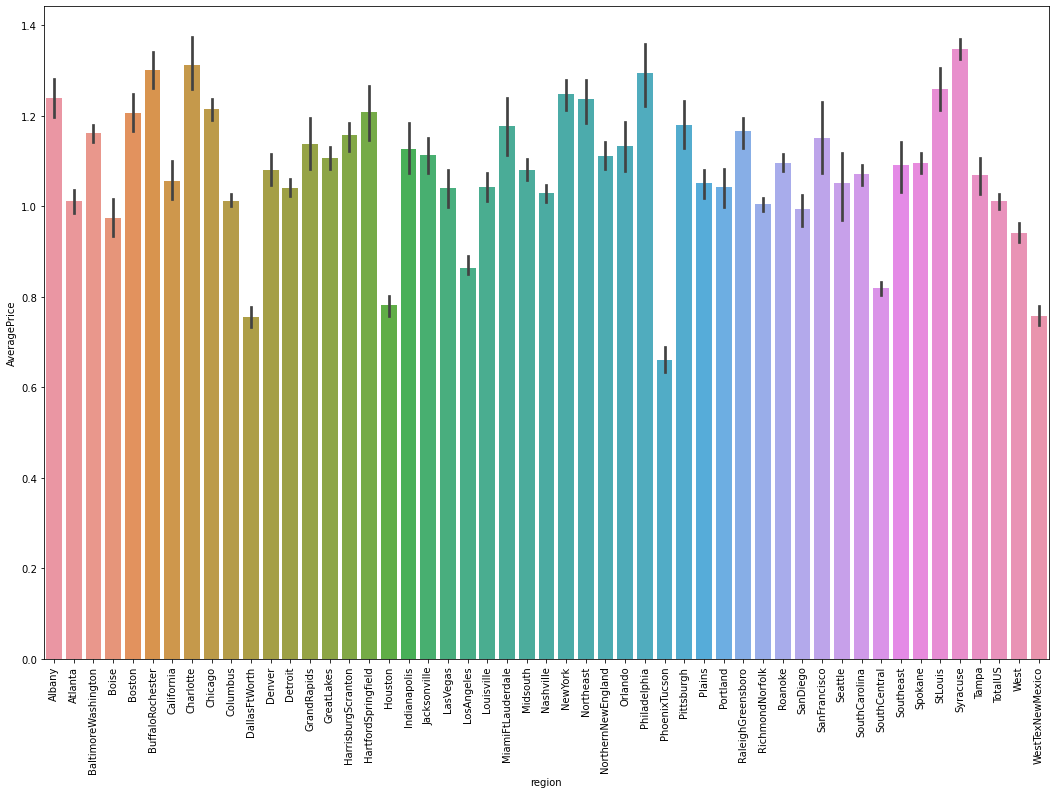

In [463]:
plt.figure(figsize=(18,12))
sns.barplot(x= 'region', y= 'AveragePrice', data= df)
plt.xticks(rotation=90)
plt.show()

Observations: Average Avacoda price was more more for Syracuse region. And less for PhoenixTucson region.

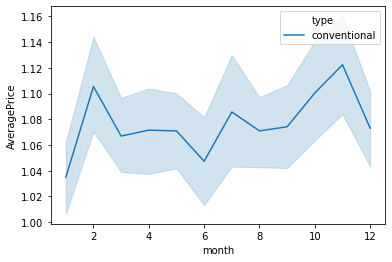

In [464]:
sns.lineplot(x= 'month', y= 'AveragePrice', hue= 'type', data= df)

Observations:  Average price increases drasticaly from month of September to November and January to February.

In [465]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,27.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12.0
1,20.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12.0
2,13.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12.0
3,12.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,6.0
4,29.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11.0


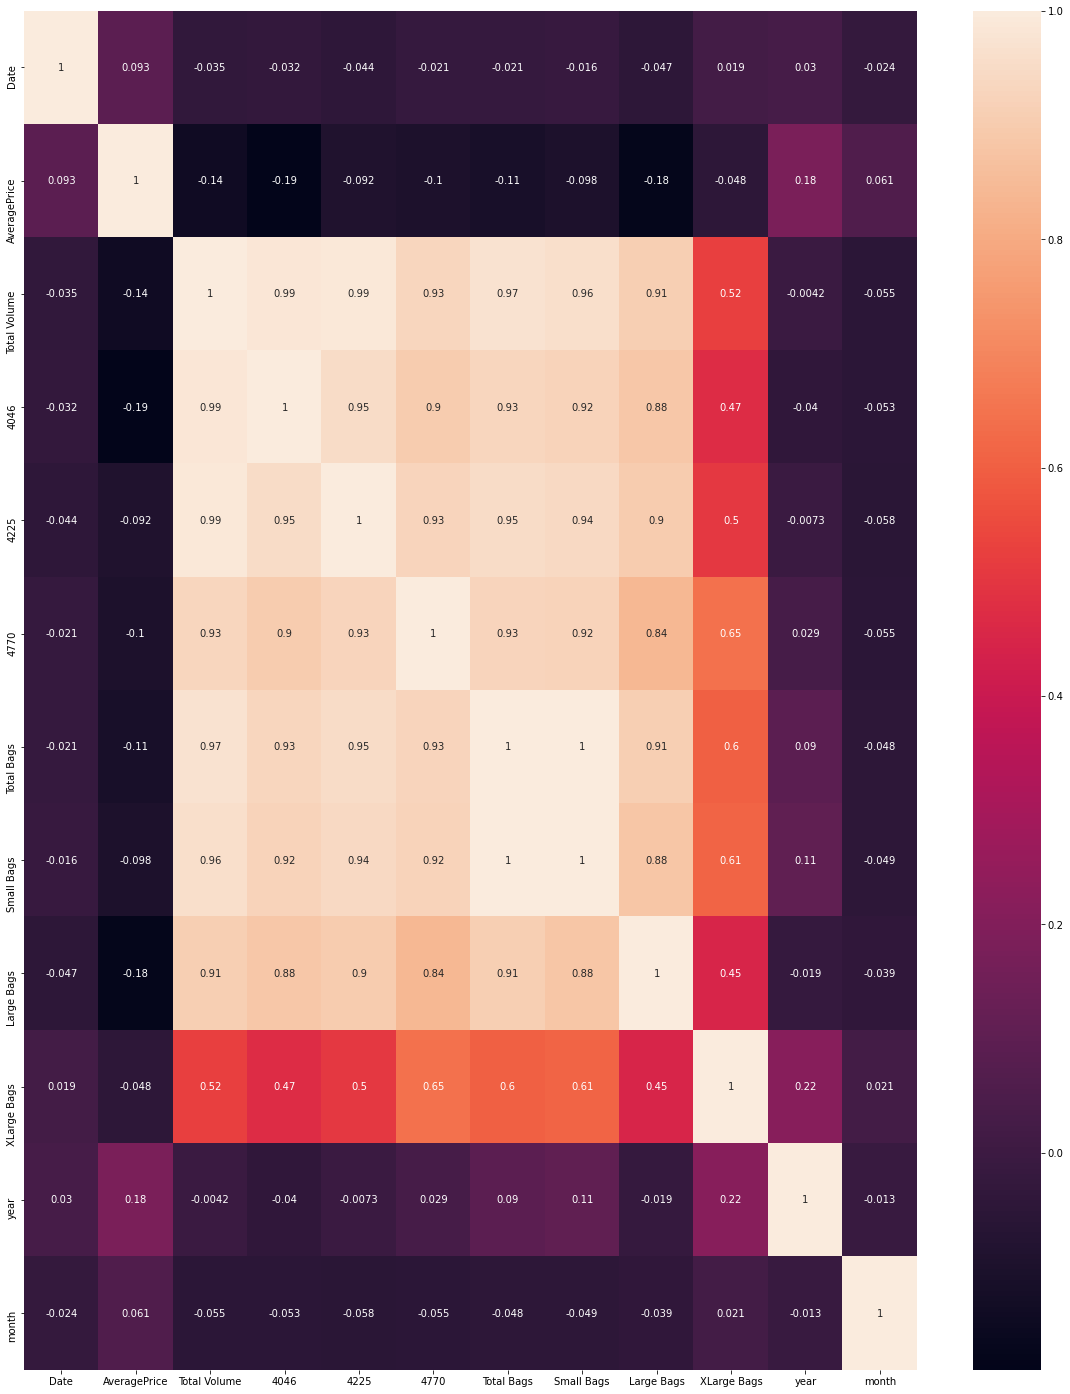

In [466]:
#Coorelation Matrix
plt.figure(figsize=(20,25))
sns.heatmap(df.corr(), annot= True)

Observations: Average Price is maximum corelated to negatively with region and also with total bags. Also with other atributes its somewhat less correlated negatively.

In [467]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,27.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12.0
1,20.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12.0
2,13.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12.0
3,12.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,6.0
4,29.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11.0


In [468]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['region']= le.fit_transform(df['region'])
df['region']

0       0
1       0
2       0
3       0
4       0
       ..
1512    7
1513    7
1514    7
1515    7
1516    7
Name: region, Length: 1517, dtype: int32

In [469]:
#Removing singular column type
df= df.drop('type', axis=1)

df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month
0,27.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,0,12.0
1,20.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,0,12.0
2,13.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,0,12.0
3,12.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,0,6.0
4,29.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,0,11.0


In [470]:
#Removing the Outliers

from scipy.stats import zscore
z= np.abs(zscore(df))
threshold=3
df_new= df[(z<3).all(axis=1)]
df_new

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month
0,27.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015.0,0,12.0
1,20.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015.0,0,12.0
2,13.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015.0,0,12.0
3,12.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015.0,0,6.0
4,29.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015.0,0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16.0,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016.0,7,10.0
1513,10.0,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016.0,7,9.0
1514,10.0,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016.0,7,2.0
1515,25.0,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016.0,7,9.0


In [471]:
df_new.shape

(1436, 13)

In [472]:
df.shape

(1517, 13)

Observations: So here we can see that due to outliers almost 81 rows removed.

In [473]:
df= df_new
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month
0,27.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,0,12.0
1,20.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,0,12.0
2,13.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,0,12.0
3,12.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,0,6.0
4,29.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,0,11.0


In [474]:
# Checking for skewness
df.skew()

Date            0.041849
AveragePrice   -0.184770
Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
year            2.004439
region          0.276276
month           0.111898
dtype: float64

In [475]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution
col=('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags', 'year')
for i in col:
        df[i] = np.log(1+df[i])

In [476]:
df.skew()

Date            0.041849
AveragePrice   -0.184770
Total Volume    0.462899
4046           -0.270283
4225            0.011359
4770           -0.449713
Total Bags      0.378673
Small Bags      0.420856
Large Bags     -0.979047
XLarge Bags     0.851740
year            2.004439
region          0.276276
month           0.111898
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013CB2CF5370>,
      dtype=object)

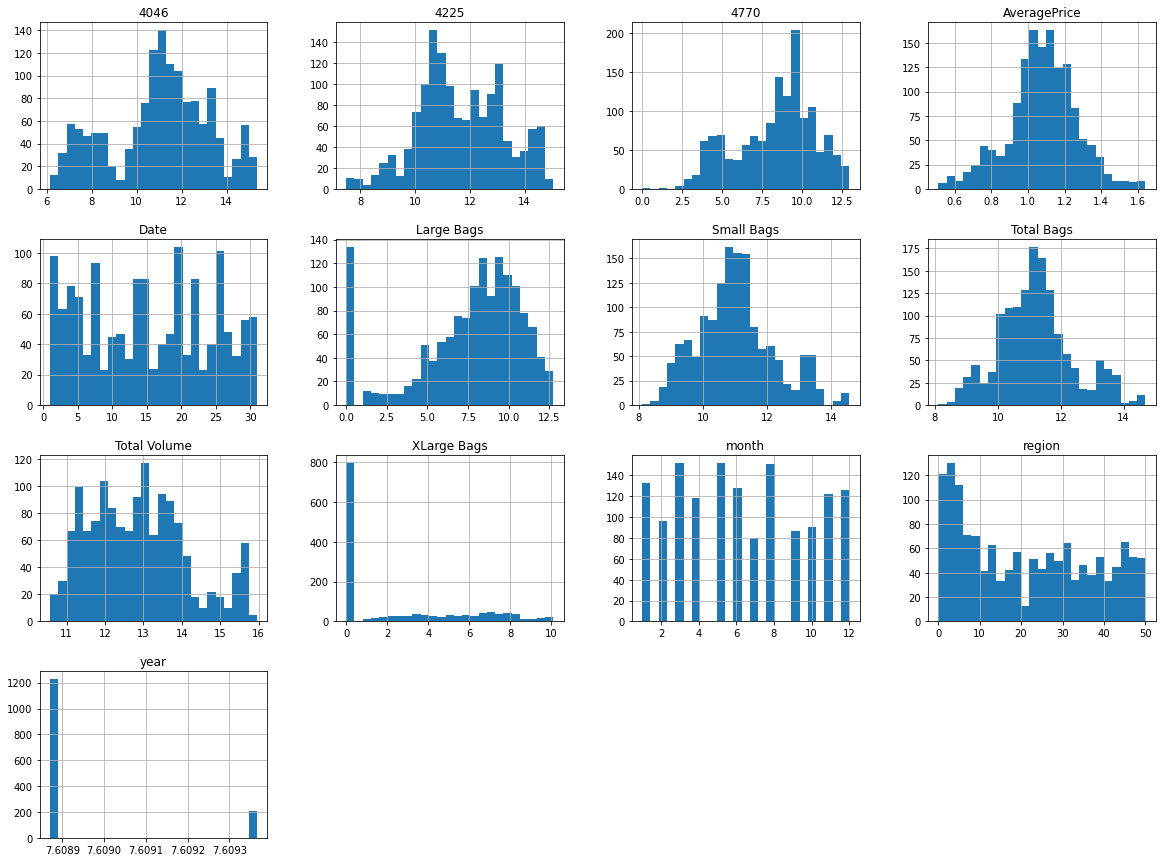

In [477]:
df.hist(figsize=(20,15), layout = (4,4), grid = True,  bins = 25)

Observations: Average price, Small bags, Total Bags, Total volume are well normally disctributed.

In [478]:
#Splitting DATA

x= df.drop(['AveragePrice', 'Date'], axis=1)
y= df[['AveragePrice']]
print(x.shape)
print(y.shape)

(1436, 11)
(1436, 1)


In [479]:
# Standardization of Data

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_x= scaler.fit_transform(x)
new_x= pd.DataFrame(data= scaled_x, columns= x.columns)
new_x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month
0,-1.410935,-1.847345,-0.507917,-1.815979,-1.822359,-1.648547,-0.917419,-0.775528,-0.413870,-1.322817,1.637005
1,-1.535660,-2.042823,-0.635183,-1.739119,-1.746806,-1.573622,-0.904196,-0.775528,-0.413870,-1.322817,1.637005
2,-0.927830,-1.968169,-0.062698,-1.413794,-1.878029,-1.705109,-0.887434,-0.775528,-0.413870,-1.322817,1.637005
3,-1.247168,-1.807390,-0.329300,-1.651131,-2.164946,-1.996977,-0.809976,-0.775528,-0.413870,-1.322817,-0.096578
4,-1.593074,-1.891150,-0.646768,-1.633730,-2.112115,-1.952576,-0.693305,-0.775528,-0.413870,-1.322817,1.348074
...,...,...,...,...,...,...,...,...,...,...,...
1431,-0.548521,-0.020619,-0.485823,0.586167,-0.189379,-0.193283,0.494754,0.946229,2.416215,-0.879305,1.059144
1432,-0.602663,-0.149612,-0.535121,0.627966,-0.135593,-0.097945,0.438844,-0.775528,2.416215,-0.879305,0.770213
1433,-0.601885,-0.118772,-0.526545,0.567203,-0.147557,-0.119231,0.426777,1.332463,2.416215,-0.879305,-1.252300
1434,-0.555668,-0.048487,-0.518124,0.585318,-0.127164,-0.083522,0.427507,-0.775528,2.416215,-0.879305,0.770213


In [480]:
x=new_x
x.shape

(1436, 11)

In [481]:
#Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score, accuracy_score

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [482]:
#Finding Best Random State
maxACCU=0
maxRS=0
for i in range(1,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.3, random_state=i)
    knn= KNeighborsRegressor()
    knn.fit(x_train, y_train)
    pred_knn= knn.predict(x_test)
    acc= r2_score(y_test, pred_knn)
    if acc>maxACCU:
        maxACCU=acc
        maxRS= i
print(maxACCU)
print(maxRS)

0.7843110518975017
63


In [483]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.3, random_state=63)

In [484]:
lm= LinearRegression()
ls= Lasso()
rd= Ridge()
enr= ElasticNet()
svr= SVR()
dtc= DecisionTreeRegressor()
knn= KNeighborsRegressor()
adr= AdaBoostRegressor()
rfr= RandomForestRegressor()
gbr= GradientBoostingRegressor()

models= [lm,ls,rd,enr,svr,dtc,knn,adr,rfr,gbr]

for m in models:
    print(m, '- R2_Score')
    m.fit(x_train, y_train)
    pred= m.predict(x_test)
    print(r2_score(y_test, pred))
    print()

LinearRegression() - R2_Score
0.4012439215911576

Lasso() - R2_Score
-1.2638232544937011e-06

Ridge() - R2_Score
0.4025086159774728

ElasticNet() - R2_Score
-1.2638232544937011e-06

SVR() - R2_Score
0.7622752862134864

DecisionTreeRegressor() - R2_Score
0.7125094074919565

KNeighborsRegressor() - R2_Score
0.7843110518975017

AdaBoostRegressor() - R2_Score
0.6228040842864371

RandomForestRegressor() - R2_Score
0.8299979371848106

GradientBoostingRegressor() - R2_Score
0.7546584254190021



In [485]:
#Cross Validation
from sklearn.model_selection import cross_val_score

for m in models:
    scr_lm= cross_val_score(m, x,y, cv=5)
    print('CV score of ',m,  scr_lm.mean())

CV score of  LinearRegression() 0.013734958253979256
CV score of  Lasso() -0.0751041280957165
CV score of  Ridge() 0.012271262435458775
CV score of  ElasticNet() -0.0751041280957165
CV score of  SVR() 0.12385931541571293
CV score of  DecisionTreeRegressor() -0.5733339866222675
CV score of  KNeighborsRegressor() -0.145156625107315
CV score of  AdaBoostRegressor() 0.13045092782268627
CV score of  RandomForestRegressor() 0.16974060190029094
CV score of  GradientBoostingRegressor() 0.15603331215483862


Observations: From above we can observe that for RandomForestRegressor model there is less difference in r2_score and cross validation r2_score so we will select RandomForestRegressor model for final predictions.

In [486]:
#Hyperparameter Tuning for Best selected model  RandomForestRegressor

from sklearn.model_selection import GridSearchCV

parameters= {'bootstrap': [True],
    'max_depth': [80, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4,],
    'min_samples_split': [10, 12],
    'n_estimators': [100, 500]}

GSV= GridSearchCV(rfr, parameters, cv=5)
GSV.fit(x_train, y_train)
GSV.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [487]:
GSV_predict= GSV.best_estimator_.predict(x_test)
print(r2_score(y_test, GSV_predict))
print('Mean absolute error:',mean_absolute_error(y_test, GSV_predict))
print('Mean squared error: ', mean_squared_error(y_test, GSV_predict))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test, GSV_predict)))

0.8099197418545988
Mean absolute error: 0.06275090135243219
Mean squared error:  0.007105663807608379
Root mean squared error:  0.0842950995468205


In [488]:
#Saving the Model
import joblib

joblib.dump(GSV.best_estimator_, 'avacado_best_rfr_model.obj')

['avacado_best_rfr_model.obj']

Conclusion: For Analysis of Avacado project we have selected RandomForestRegressor model which having accuracy almost 81%.